In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Topics covered in this notebook
## 1. General Introduction
## 2. Modeling Steps
## 3. Example
## 4. Modeling - Adaboost

# 1. General Introduction
- Boosting is a general ensemble method that creates a strong classifier from a number of weak classifiers.
- This is done by building a model from the training data, then creating a second model that attempts to correct the errors from the first model. Models are added until the training set is predicted perfectly or a maximum number of models are added.

# 2. Modeling Steps
- Each instance in the training dataset is weighted. The initial weight is set to: 
$$ w_i = 1/n $$
, where n is the number of training instances.
- Fit a weak classifier to the training data, outputs +1 or -1, and calculate the misclassification rate: 
$$ err_m = \frac {\sum_{i=1}^n w_i I(y_i \neq G_m(x_i))} {\sum_{i=1}^n w_i}$$
, where m is the index of a weak classifier.
- Compute (see Figure I): 
$$\alpha_m = \frac {1} {2} \log \frac {1-err_m} {err_m}$$
- Update weights (see Figure II): 
$$ w_{i+1} = \frac {w_i \exp(-\alpha_m y_i G_m(x_i))} {Z_i}$$
$$ Z_i = \sum_{i=1}^n w_i \exp(-\alpha_m y_i G_m(x_i)) $$
, where Z_i makes sure the weight vector added up to 1.
- Prediction (ensemble):
$$ G(x) = sign(\sum_{m=1}^M  \alpha_m G_m(x)) $$

## Figure I
- Relationship between alpha and error rate.

In [2]:
alpha_m = []
for error_rate in np.arange(0,1.1,0.1):
    alpha_m.append(np.log((1-error_rate)/error_rate))

/Users/wuchenhong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/wuchenhong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


In [3]:
# To avoid having -inf and inf values, I used misclassification rate very closed to 0 and 1.
alpha_m[0] = np.log((1-0.0001)/0.0001)
alpha_m[-1] = np.log((1-0.9999)/0.9999)

Text(0, 0.5, 'alpha(m)')

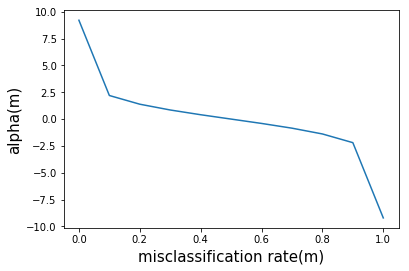

In [4]:
plt.plot(np.arange(0,1.1,0.1),alpha_m)
plt.xlabel('misclassification rate(m)', fontsize=15)
plt.ylabel('alpha(m)', fontsize=15)

- **Three key points to take from the above graph:**
    1. The classifier's alpha grows exponentially as the error approaches 0. Better classifiers are given exponentially more weight.
    2. The classifier's alpha is zero if the error rate is 0.5. A classifier with 50% accuracy is no better than random guessing.
    3. The classifier's alpha grows exponentially negative as the error approaches 1. We give a negative weight to classifiers with worse worse than 50% accuracy. “Whatever that classifier says, do the opposite!”.

In [5]:
print('When the misclassification rate is 0.5, the corresponding alpha(m) is {}.'.format(
    np.log((1-0.5)/0.5)))

When the misclassification rate is 0.5, the corresponding alpha(m) is 0.0.


## Figure II

In [6]:
exp_result = []
for i in np.arange(-1,1.25,0.25):
    exp_result.append(np.exp(i))

Text(0, 0.5, 'exp(x)')

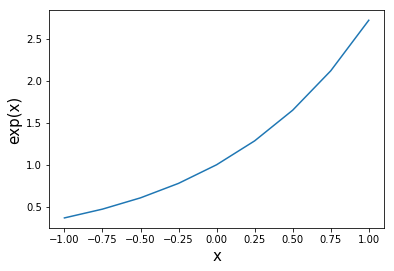

In [7]:
plt.plot(np.arange(-1,1.25,0.25),exp_result)
plt.xlabel('x', fontsize=15)
plt.ylabel('exp(x)', fontsize=15)

- **Three key points to take from the above graph:**
    1. Return a fraction for negative values of x.
    2. A value greater than one for positive values of x.
    3. Has the effect of lowering down weights for data points classified correctly .

# 3. Example

| - | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 |
| - | - | - | - | - | - | - | - | - | - | - |
| X | 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 |
| Y | 1 | 1 | 1 | -1 | -1 | -1 | 1 | 1 | 1 | -1 |

## Iteration 1

- **Initiate equal weights:**

In [8]:
w_1 = [1/10] * 10
w_1

[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]

- **Select a threshold at 2.5 to achieve the smallest error rate:**

$$ G_1(x) = 
\begin{cases}
    1 & \text{if } \text{x < 2.5}\\
    -1 & \text{if } \text{x > 2.5}
\end{cases} $$

| - | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 |
| - | - | - | - | - | - | - | - | - | - | - |
| X | 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 |
| Y | 1 | 1 | 1 | -1 | -1 | -1 | 1 | 1 | 1 | -1 |
| Pred Y | 1 | 1 | 1 | -1 | -1 | -1 | **-1** | **-1** | **-1** | -1 |

- **Compute error rate**:
$$ err_{m1} = \frac{0.1+0.1+0.1}{1} = 0.3 $$ 

- **Compute alpha:**
$$\alpha_{m1} = \frac {1} {2} \log {\frac {1-0.3} {0.3}} = 0.4236 $$ 

In [9]:
alpha_1 = 0.5*(np.log((1-0.3)/0.3))
alpha_1

0.42364893019360184

- **Update weights:**

In [10]:
# Z_i
# Left: data points which are incorrectly predicted by the model 1
# Right:data points which are correctly predicted by the model 1
z_1 = np.exp(-0.4236*-1)*0.1*3 + np.exp(-0.4236*1)*0.1*7

In [11]:
w_1[6:9] = [0.1*np.exp(-0.4236*-1)/z_1]*3
w_1[0:6] = [0.1*np.exp(-0.4236*1)/z_1]*6
w_1[-1] = 0.1*(np.exp(-0.4236*1)/z_1)

In [12]:
# Notice: data points which are
# incorrectly predicted by the model 1 have higher weights
# compared with data points which are orrectly predicted!
w_1

[0.07143206644239734,
 0.07143206644239734,
 0.07143206644239734,
 0.07143206644239734,
 0.07143206644239734,
 0.07143206644239734,
 0.1666585116344062,
 0.1666585116344062,
 0.1666585116344062,
 0.07143206644239734]

## Iteration 2

- **Select a threshold at 8.5 to achieve the smallest error rate:**

$$ G_2(x) = 
\begin{cases}
    1 & \text{if } \text{x < 8.5}\\
    -1 & \text{if } \text{x > 8.5}
\end{cases} $$

| - | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 |
| - | - | - | - | - | - | - | - | - | - | - |
| X | 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 |
| Y | 1 | 1 | 1 | -1 | -1 | -1 | 1 | 1 | 1 | -1 |
| Pred Y | 1 | 1 | 1 | **1** | **1** | **1** | 1 | 1 | 1 | -1 |

- **Compute**:
$$ err_{m2} = 0.2143 $$ 

In [13]:
sum(w_1[3:6])

0.21429619932719202

- **Compute:**
$$\alpha_{m2} = \frac {1} {2} \log {\frac {1-0.2143} {0.2143}} = 0.6496 $$ 

In [14]:
alpha_2 = 0.5*(np.log((1-0.2143)/0.2143))
alpha_2

0.6495990688511224

- **Update weights:**

In [15]:
z_2 = 0
for i in range(len(w_1)):
    if i in (3,4,5):
        temp = np.exp(-0.6495990688511224*-1)*w_1[i]
    else:
        temp = np.exp(-0.6495990688511224*1)*w_1[i]
    z_2+=temp

In [16]:
w_2 = []
for i in range(len(w_1)):
    if i in (3,4,5):
        w_2.append((w_1[i] / z_2) * np.exp(-0.6495990688511224*-1))
    else:
        w_2.append((w_1[i] / z_2) * np.exp(-0.6495990688511224*1))

In [17]:
w_2

[0.04545788921353735,
 0.04545788921353735,
 0.04545788921353735,
 0.1666647856046491,
 0.1666647856046491,
 0.1666647856046491,
 0.1060580287773011,
 0.1060580287773011,
 0.1060580287773011,
 0.04545788921353735]

## Iteration 3

- **Select a threshold at 5.5 to achieve the smallest error rate:**

$$ G_3(x) = 
\begin{cases}
    1 & \text{if } \text{x > 5.5}\\
    -1 & \text{if } \text{x < 5.5}
\end{cases} $$

| - | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 |
| - | - | - | - | - | - | - | - | - | - | - |
| X | 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 |
| Y | 1 | 1 | 1 | -1 | -1 | -1 | 1 | 1 | 1 | -1 |
| Pred Y | **-1** | **-1** | **-1** | -1 | -1 | -1 | 1 | 1 | 1 | **1** |

- **Compute**:
$$ err_{m3} = 0.1818 $$ 

In [18]:
err_m3 = 0
for i in range(len(w_2)):
    if i in (0,1,2,9):
        err_m3+=w_2[i]

In [19]:
err_m3

0.1818315568541494

- **Compute:**
$$\alpha_{m3} = \frac {1} {2} \log {\frac {1-0.1818} {0.1818}} = 0.7521 $$ 

In [20]:
alpha_3 = 0.5*(np.log((1-0.1818)/0.1818))
alpha_3

0.75209981187596

- **Update weights:**

In [21]:
z_3 = 0
for i in range(len(w_2)):
    if i in (0,1,2,9):
        temp = np.exp(-0.75209981187596*-1)*w_2[i]
    else:
        temp = np.exp(-0.75209981187596*1)*w_2[i]
    z_3+=temp

In [22]:
w_3 = []
for i in range(len(w_2)):
    if i in (0,1,2,9):
        w_3.append((w_2[i] / z_3) * np.exp(-0.75209981187596*-1))
    else:
        w_3.append((w_2[i] / z_3) * np.exp(-0.75209981187596*1))

In [23]:
w_3

[0.12501325839792937,
 0.12501325839792937,
 0.12501325839792937,
 0.10184156412798416,
 0.10184156412798416,
 0.10184156412798416,
 0.06480742467477667,
 0.06480742467477667,
 0.06480742467477667,
 0.12501325839792937]

## Takeaway
- **1. Misclassified datapoints have higher updated weights. Datapoints correctly predicted have assigned lower updated weights. For instance, at the iteration 1, 7th, 8th, and 9th misclassified datapoints have been assigned higher weights 0.1666, compared with other datapoints.**
- **2. In the next iteration, the model always learns the best and achieves the minimum error rate of itself by selecting an optimal threshold. At the same time, misclassified datapoints predicted by the previous model will be correctly classified by the next model due to the higher weights and the next model can thus avoid having a higher error rate.**

- **3. The error rate keeps reducing through iterations. For this example, the error rate reduced from 0.3 to 0.2143, and from 0.2143 to 0.1818.**

## Final Boosting Models (Predictions)

In [24]:
pred_y1 = np.sign(alpha_1*1+alpha_2*1+alpha_3*-1)
pred_y2 = np.sign(alpha_1*1+alpha_2*1+alpha_3*-1)
pred_y3 = np.sign(alpha_1*1+alpha_2*1+alpha_3*-1)
pred_y4 = np.sign(alpha_1*-1+alpha_2*1+alpha_3*-1)
pred_y5 = np.sign(alpha_1*-1+alpha_2*1+alpha_3*-1)
pred_y6 = np.sign(alpha_1*-1+alpha_2*1+alpha_3*-1)
pred_y7 = np.sign(alpha_1*-1+alpha_2*1+alpha_3*1)
pred_y8 = np.sign(alpha_1*-1+alpha_2*1+alpha_3*1)
pred_y9 = np.sign(alpha_1*-1+alpha_2*1+alpha_3*1)
pred_y10 = np.sign(alpha_1*-1+alpha_2*-1+alpha_3*1)

In [25]:
# 100% accuracy achieved!
pred_y1, pred_y2, pred_y3, pred_y4, pred_y5, pred_y6, pred_y7, pred_y8, pred_y9, pred_y10

(1.0, 1.0, 1.0, -1.0, -1.0, -1.0, 1.0, 1.0, 1.0, -1.0)

| - | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 |
| - | - | - | - | - | - | - | - | - | - | - |
| X | 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 |
| Y | 1 | 1 | 1 | -1 | -1 | -1 | 1 | 1 | 1 | -1 |
| Pred Y | 1 | 1 | 1 | -1 | -1 | -1 | 1 | 1 | 1 | -1 |

In [26]:
sign_output = []
for i in np.arange(-1.0, 1.1, 0.1):
    sign_output.append(np.sign(i))

Text(0, 0.5, 'sign(x)')

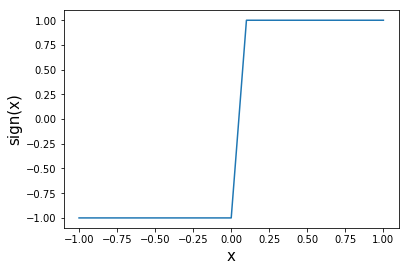

In [27]:
# Sign function given different inputs
# When x is larger than 0, then the output is always 1.
# When x is less than 0, then the output is always -1.
plt.plot(np.arange(-1.0, 1.1, 0.1), sign_output)
plt.xlabel('x', fontsize=15)
plt.ylabel('sign(x)', fontsize=15)